<a href="https://colab.research.google.com/github/RafdhiFatoni/ISE-Data-Science-Academy/blob/main/Tugas%202%20DS%20Academyipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TUGAS - 2 (RRR TEAM)

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

lokasi_file = "/content/dataset3.csv"
df = pd.read_csv(lokasi_file)
df.head(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              28638 non-null  int64  
 1   Age             28638 non-null  int64  
 2   Income          28638 non-null  int64  
 3   Home            28638 non-null  object 
 4   Emp_length      28638 non-null  float64
 5   Intent          28638 non-null  object 
 6   Amount          28638 non-null  int64  
 7   Rate            28638 non-null  float64
 8   Status          28638 non-null  int64  
 9   Percent_income  28638 non-null  float64
 10  Default         28638 non-null  object 
 11  Cred_length     28638 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.8+ MB


In [ ]:
df.value_counts

<bound method DataFrame.value_counts of           Id  Age  Income      Home  Emp_length           Intent  Amount  \
0          0   22   59000      RENT       123.0         PERSONAL   35000   
1          1   21    9600       OWN         5.0        EDUCATION    1000   
2          2   25    9600  MORTGAGE         1.0          MEDICAL    5500   
3          3   23   65500      RENT         4.0          MEDICAL   35000   
4          4   24   54400      RENT         8.0          MEDICAL   35000   
...      ...  ...     ...       ...         ...              ...     ...   
32576  32576   57   53000  MORTGAGE         1.0         PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   
32578  32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000   
32579  32579   56  150000  MORTGAGE         5.0         PERSONAL   15000   
32580  32780   66   42000      RENT         2.0          MEDICAL    6475   

        Rate  Status  Percent_income Default  C

<Axes: >

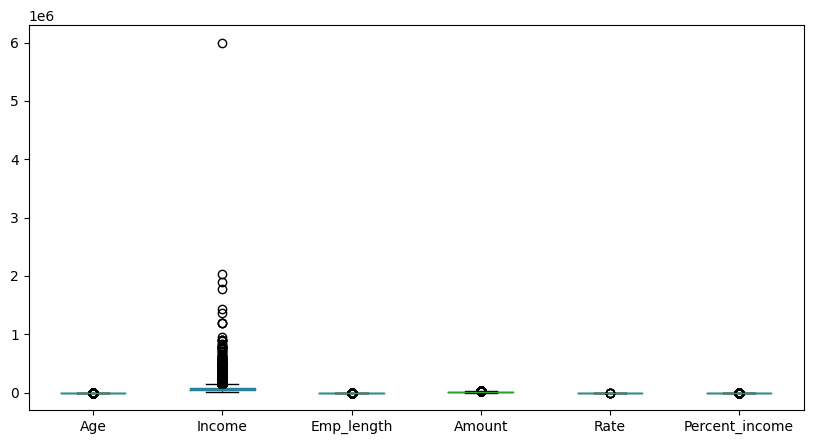

In [ ]:
#Menampilkan Grafik Outlier
num_col = ["Age", "Income", "Emp_length", "Amount", "Rate","Percent_income"]
df[num_col].boxplot(grid=False, figsize=(10, 5))

In [ ]:
#Menampilkan jumlah missing value
np.sum(df.isnull())

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [36]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
39,39,23,71500,RENT,3.0,DEBTCONSOLIDATION,30000,NaN,1,0.42,N,4
50,50,24,78000,RENT,4.0,DEBTCONSOLIDATION,30000,NaN,1,0.38,Y,4
57,57,23,277000,OWN,3.0,PERSONAL,35000,NaN,0,0.13,N,4
59,59,24,12000,OWN,2.0,VENTURE,1750,NaN,0,0.15,Y,3
62,62,26,263000,MORTGAGE,0.0,EDUCATION,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,32547,53,4888,OWN,0.0,VENTURE,1400,NaN,1,0.29,Y,28
32552,32552,65,45900,RENT,2.0,EDUCATION,10000,NaN,0,0.22,Y,19
32553,32553,54,20000,RENT,2.0,MEDICAL,5000,NaN,0,0.25,N,28
32569,32569,51,60000,MORTGAGE,1.0,PERSONAL,7500,NaN,0,0.13,N,23


In [35]:
missing_data = df.isnull()
print(np.where(missing_data == True))

(array([   39,    50,    57, ..., 32553, 32569, 32570]), array([7, 7, 7, ..., 7, 7, 7]))


In [ ]:
# Menentukan outlier pada kolom Age menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z1 = np.abs(stats.zscore(df['Age']))
print(z1)

0        0.903374
1        1.060904
2        0.430783
3        0.745843
4        0.588313
           ...   
32576    4.610190
32577    4.137599
32578    5.870433
32579    4.452660
32580    6.027964
Name: Age, Length: 32581, dtype: float64


In [ ]:
# Menentukan outlier pada kolom Income menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z2 = np.abs(stats.zscore(df['Income']))
print(z2)

0        0.114143
1        0.911147
2        0.911147
3        0.009274
4        0.188358
           ...   
32576    0.210945
32577    0.870011
32578    0.160129
32579    1.354021
32580    0.388416
Name: Income, Length: 32581, dtype: float64


In [ ]:
# Menentukan outlier pada kolom Emp_length menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z3 = np.abs(stats.zscore(df['Emp_length']))
print(z3)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32576   NaN
32577   NaN
32578   NaN
32579   NaN
32580   NaN
Name: Emp_length, Length: 32581, dtype: float64


In [ ]:
# Menentukan outlier pada kolom Amount menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z4 = np.abs(stats.zscore(df['Amount']))
print(z4)

0        4.019404
1        1.358650
2        0.646849
3        4.019404
4        4.019404
           ...   
32576    0.599395
32577    1.271060
32578    4.019404
32579    0.855843
32580    0.492625
Name: Amount, Length: 32581, dtype: float64


In [ ]:
# Menentukan outlier pada kolom Rate menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z5 = np.abs(stats.zscore(df['Rate']))
print(z5)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32576   NaN
32577   NaN
32578   NaN
32579   NaN
32580   NaN
Name: Rate, Length: 32581, dtype: float64


In [ ]:
# Menentukan outlier pada kolom Percent_income menggunakan z-score dari library SciPy
# NOTE: data dikatakan sebagai outlier apabila nilai z-score > 3
z6 = np.abs(stats.zscore(df['Percent_income']))
print(z6)

0        3.931411
1        0.657458
2        3.744110
3        3.369508
4        3.556809
           ...   
32576    0.563808
32577    0.189207
32578    2.713956
32579    0.657458
32580    0.189207
Name: Percent_income, Length: 32581, dtype: float64


In [ ]:
# Menampilkan data outlier
print(np.where(z1 > 3))
print(np.where(z2 > 3))
print(np.where(z3 > 3))
print(np.where(z4 > 3))
print(np.where(z5 > 3))
print(np.where(z6 > 3))

(array([   81,   183,   575,   747, 29121, 29143, 29147, 29163, 29182,
       29193, 29211, 29220, 29239, 29243, 29252, 29269, 29270, 29278,
       29285, 29300, 29305, 29325, 29350, 29375, 29376, 29384, 29386,
       29390, 29396, 29403, 29413, 29414, 29446, 29449, 29454, 29461,
       29482, 29489, 29490, 29493, 29505, 29519, 29542, 29547, 29575,
       29582, 29588, 29598, 29603, 29616, 29623, 29628, 29655, 29671,
       29678, 29683, 29688, 29707, 29741, 29755, 29772, 29782, 29814,
       29827, 29840, 29874, 29877, 29878, 29906, 29907, 29918, 29921,
       29925, 29927, 29930, 29946, 29952, 29958, 29959, 29962, 29971,
       29978, 29985, 30000, 30003, 30015, 30017, 30022, 30025, 30030,
       30032, 30033, 30056, 30081, 30086, 30108, 30124, 30163, 30167,
       30180, 30182, 30188, 30203, 30246, 30252, 30253, 30261, 30275,
       30277, 30283, 30288, 30290, 30299, 30304, 30323, 30330, 30344,
       30358, 30363, 30392, 30398, 30412, 30421, 30466, 30485, 30508,
       30525, 30532

In [ ]:
# Menghapus data outlier
# Menghitung IQR (Interquartile Range) untuk kolom Income (kolom yang ingin dihapus outliernya)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat data frame tanpa outlier
cleaned_df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Menampilkan jumlah data (non-missing value) pada setiap kolom
cleaned_df.count()

Id                31097
Age               31097
Income            31097
Home              31097
Emp_length        30216
Intent            31097
Amount            31097
Rate              28119
Status            31097
Percent_income    31097
Default           31097
Cred_length       31097
dtype: int64

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31097 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31097 non-null  int64  
 1   Age             31097 non-null  int64  
 2   Income          31097 non-null  int64  
 3   Home            31097 non-null  object 
 4   Emp_length      30216 non-null  float64
 5   Intent          31097 non-null  object 
 6   Amount          31097 non-null  int64  
 7   Rate            28119 non-null  float64
 8   Status          31097 non-null  int64  
 9   Percent_income  31097 non-null  float64
 10  Default         31097 non-null  object 
 11  Cred_length     31097 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.1+ MB


In [ ]:
cleaned_df.head(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
cleaned_df.value_counts()

Id     Age  Income  Home      Emp_length  Intent             Amount  Rate   Status  Percent_income  Default  Cred_length
0      22   59000   RENT      123.0       PERSONAL           35000   16.02  1       0.59            Y        3              1
21511  32   27000   RENT      2.0         MEDICAL            6000    12.73  0       0.22            N        10             1
21509  35   26400   RENT      2.0         DEBTCONSOLIDATION  6000    16.29  1       0.23            Y        8              1
21508  27   26004   RENT      7.0         VENTURE            6000    7.14   0       0.23            N        5              1
21507  27   26000   RENT      6.0         PERSONAL           6000    10.75  0       0.23            N        10             1
                                                                                                                           ..
10551  25   33500   RENT      2.0         VENTURE            10000   10.25  0       0.30            N        3             